In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class Model(nn.Module):

    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        # How many layers ?
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [3]:
torch.manual_seed(32)
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../Datasets/iris.csv')

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
X = df.drop('target', axis=1)
y = df['target']

In [8]:
X = X.values
y = y.values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=33)

In [11]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [12]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [14]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [15]:
epochs = 100
losses = []

for i in range (epochs):

    y_pred = model.forward(X_train)

# Cal loss
    loss = criterion(y_pred, y_train)

    losses.append(loss)

    if i%10 == 0:
        print(f'epoch {i} and loss is: {loss}')
#  Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch 0 and loss is: 1.1507115364074707
epoch 10 and loss is: 0.9377315640449524
epoch 20 and loss is: 0.7798256278038025
epoch 30 and loss is: 0.6099401712417603
epoch 40 and loss is: 0.40079933404922485
epoch 50 and loss is: 0.2543632388114929
epoch 60 and loss is: 0.15053051710128784
epoch 70 and loss is: 0.10086946934461594
epoch 80 and loss is: 0.08128314465284348
epoch 90 and loss is: 0.07231427729129791


Text(0.5, 0, 'Epoch')

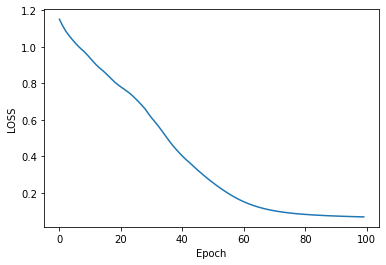

In [16]:
plt.plot(range(epochs), losses)
plt.ylabel('LOSS')
plt.xlabel('Epoch')

In [18]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [19]:
loss

tensor(0.0581)

In [23]:
correct = 0

with torch.no_grad():

    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'Data {i + 1}.)   {str({y_val})}   {y_test[i]}')

        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'We got {correct} correct')

Data 1.)   {tensor([-2.1252,  4.8064, -0.8628])}   1
Data 2.)   {tensor([-1.7985,  5.3098, -1.5449])}   1
Data 3.)   {tensor([  6.3542,   0.8438, -10.0541])}   0
Data 4.)   {tensor([-3.9123,  4.5958,  1.1693])}   1
Data 5.)   {tensor([-7.4713,  3.2021,  5.7853])}   2
Data 6.)   {tensor([-10.4976,   1.6459,   9.6297])}   2
Data 7.)   {tensor([  6.3201,   0.9917, -10.1532])}   0
Data 8.)   {tensor([  7.0468,   0.7059, -10.9137])}   0
Data 9.)   {tensor([-7.2061,  3.3477,  5.3565])}   2
Data 10.)   {tensor([-9.3960,  2.5759,  8.1033])}   2
Data 11.)   {tensor([-9.8808,  2.3475,  8.7141])}   2
Data 12.)   {tensor([ 6.2748,  0.6655, -9.7613])}   0
Data 13.)   {tensor([-9.3142,  2.1880,  8.1947])}   2
Data 14.)   {tensor([-3.7803,  4.5050,  1.0752])}   1
Data 15.)   {tensor([-7.8657,  3.0117,  6.2303])}   2
Data 16.)   {tensor([-1.8867,  5.1572, -1.3345])}   1
Data 17.)   {tensor([-5.7006,  3.5030,  3.6696])}   2
Data 18.)   {tensor([  7.1789,   0.7369, -11.1350])}   0
Data 19.)   {tensor([-

In [24]:
torch.save(model.state_dict(), 'my_iris_model.pt')

In [25]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris_model.pt'))

<All keys matched successfully>

In [26]:
model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [27]:
mystery_iris = torch.tensor([5.6, 3.7, 2.2, 0.5])

In [29]:
with torch.no_grad():
    print(new_model(mystery_iris).argmax())

tensor(0)
